# TEXT EMOTION DETECTION

## LIBRARY IMPORT

In [3]:
!pip install neattext

In [4]:
import pandas as aju
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

import neattext.functions as nfx

In [5]:
warnings.filterwarnings('ignore')

## DATA IMPORT

In [7]:
df = aju.read_csv('../DATA/emotion_dataset_raw.csv')

## EDA

In [9]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [10]:
df.shape

(34792, 2)

In [11]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

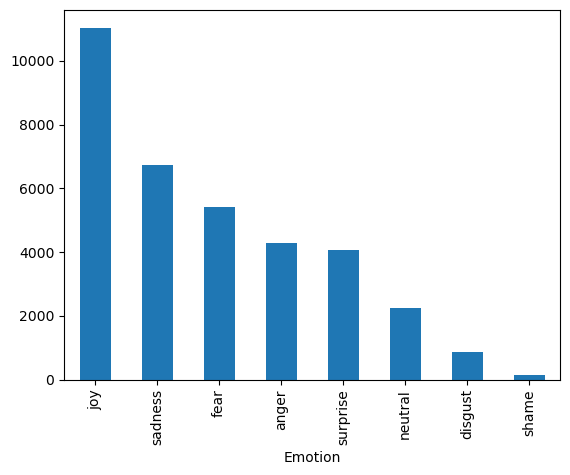

In [12]:
df['Emotion'].value_counts().plot(kind = 'bar')
plt.show()

**From the above plot we can see that *Joy* has the high count and *Shame* has the low count**

## DATA PREPROCESSING

***neattext* is a library used to clean and preprocess text data**  

* It is used to clean unstructured text data, reduce noises, avoid repetition of same code

### REMOVING USER HANDLES

**Removing user handles like id name,twitter handles**

In [18]:
df['clean_text'] = df.Text.apply(nfx.remove_userhandles)
df.head()

,Emotion,Text,clean_text
0,neutral,Why ?,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz for u .! babe naamazed ...


### REMOVING STOPWORDS

**Removing stopwords like *and,or,the,a,an...* that doesn't gonna affect the prediction**

In [21]:
df['clean_text'] = df.clean_text.apply(nfx.remove_stopwords)
df.head(10)

,Emotion,Text,clean_text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
5,fear,I'm expecting an extremely important phonecall...,I'm expecting extremely important phonecall mi...
6,sadness,.Couldnt wait to see them live. If missing th...,.Couldnt wait live. missing NH7 wasnt painful ...
7,surprise,maken Tip 2: Stop op een moment dat je het hel...,maken Tip 2: Stop op een moment dat je het hel...
8,surprise,En dan krijg je ff een cadeautje van een tweep...,En dan krijg je ff een cadeautje van een tweep...
9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...,Drummer Boy bij op verzoek van . : welke uitvo...


In [22]:
df1 = df.drop('Text',axis = 'columns')
df1

,Emotion,clean_text
0,neutral,?
1,joy,Sage Act upgrade list tommorow.
2,sadness,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...
34787,surprise,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,man robbed today .
34790,fear,"Youu JEALOUSY, #Losing YOU..."


## TRAIN TEST SPLIT

In [24]:
df2 = df1.head(1000)

In [25]:
df2.Emotion.value_counts()

Emotion
joy         291
sadness     208
fear        169
anger       138
surprise    105
neutral      61
disgust      24
shame         4
Name: count, dtype: int64

In [26]:
x = df2.clean_text
y = df2.Emotion

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify = y,test_size = 0.3,random_state = 99)

In [28]:
smote = SMOTE(k_neighbors= 1,random_state=99)
vect = TfidfVectorizer(max_features=5000)

In [29]:
x_train_vec = vect.fit_transform(x_train)

In [30]:
x_test_vec = vect.transform(x_test)

In [31]:
x_test_dense = x_test_vec.toarray()

In [32]:
x_train_vec_dense = x_train_vec.toarray()

In [33]:
x_train_res,y_train_res = smote.fit_resample(x_train_vec_dense,y_train)

<Axes: xlabel='Emotion'>

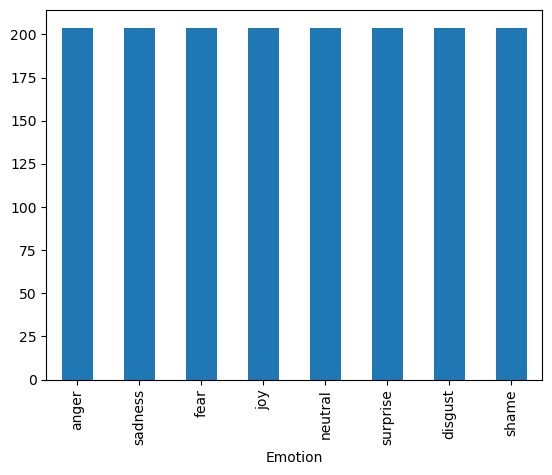

In [34]:
y_train_res.value_counts().plot(kind = 'bar')

## MODEL TRAINING

In [36]:
lr_pipe = Pipeline(steps=[('cv',TfidfVectorizer(max_features=5000)),('lr',LogisticRegression())])
lr_pipe.fit(x_train,y_train)
lr_res = lr_pipe.score(x_test,y_test)

In [37]:
SVC_pipe = Pipeline(steps=[('cv',TfidfVectorizer(max_features=5000)),('lr',SVC())])
SVC_pipe.fit(x_train,y_train)
svc_res = SVC_pipe.score(x_test,y_test)

In [38]:
rfc_pipe = Pipeline(steps=[('cv',TfidfVectorizer(max_features=5000)),('lr',RandomForestClassifier())])
rfc_pipe.fit(x_train,y_train)
rfc_res = rfc_pipe.score(x_test,y_test)

In [39]:
print(lr_res,"|",svc_res,"|",rfc_res)

0.4066666666666667 | 0.3466666666666667 | 0.36666666666666664


## HYPERPARAMETER TUNING

In [41]:
model_params = {
    'svm':{
        'model': SVC(gamma = 'auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'rfc':{
      'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [100,150,200]
        }
    },
    'lr':{
        'model': LogisticRegression(solver = 'liblinear',multi_class = 'auto'),
        'params':{
            'C': [1,5,10]
        }
    }
}

In [42]:
best_models = {}
for name,mp in model_params.items():
    print(f"\nRunning GridSearchCV for {name}..")
    print(mp['model'])
    clf = GridSearchCV(mp['model'],mp['params'],cv=3,scoring = 'f1_macro',n_jobs = -1)
    clf.fit(x_train_res,y_train_res)
    y_pred = clf.predict(x_test_dense)
    acc = accuracy_score(y_test,y_pred)
    print(f"Best params for {name}: {clf.best_params_}")
    print(f"Best score for {name}: {clf.best_score_}")
    print(f"Accuracy:{acc : .2f}")

    best_models[name] = clf


Running GridSearchCV for svm..
SVC(gamma='auto')
Best params for svm: {'C': 1, 'kernel': 'linear'}
Best score for svm: 0.8201378114136166
Accuracy: 0.42

Running GridSearchCV for rfc..
RandomForestClassifier()
Best params for rfc: {'n_estimators': 200}
Best score for rfc: 0.7436600650709648
Accuracy: 0.33

Running GridSearchCV for lr..
LogisticRegression(multi_class='auto', solver='liblinear')
Best params for lr: {'C': 5}
Best score for lr: 0.817210746534638
Accuracy: 0.43


## FIT LR FOR D1

In [44]:
x = df1.clean_text
y = df1.Emotion

<Axes: xlabel='Emotion'>

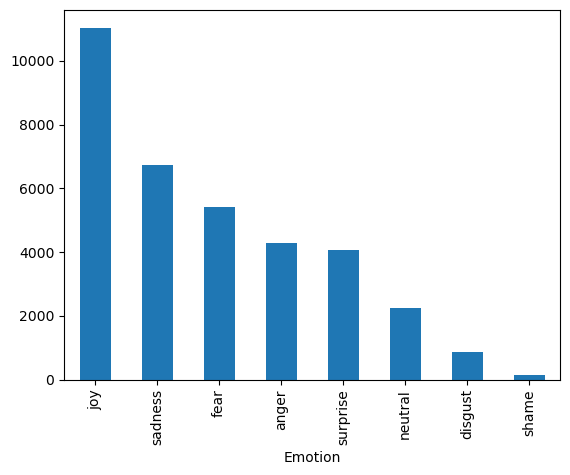

In [45]:
df1.Emotion.value_counts().plot(kind = 'bar')

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify = y,test_size = 0.3,random_state = 99)

In [47]:
smt = SMOTE(k_neighbors= 3,random_state = 99)
vect = TfidfVectorizer(max_features=5000)

In [48]:
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)
x_train_dense = x_train_vect.toarray()
x_test_dense = x_test_vect.toarray()

In [49]:
x_train_re,y_train_re = smt.fit_resample(x_train_dense,y_train)

<Axes: xlabel='Emotion'>

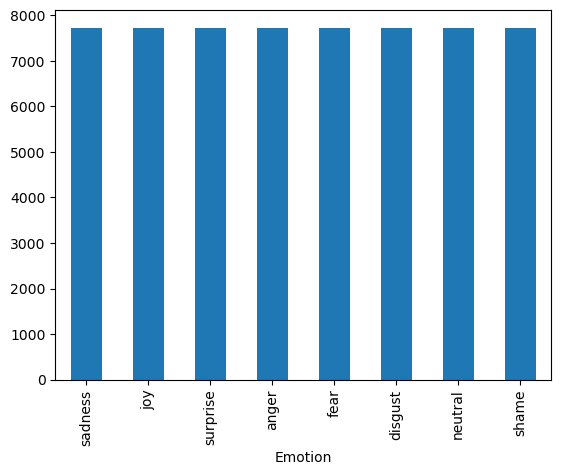

In [50]:
y_train_re.value_counts().plot(kind = 'bar')

In [51]:
lr = LogisticRegression(multi_class= 'auto',solver = 'liblinear',C=3.5,max_iter= 10000,)
lr.fit(x_train_re,y_train_re)
y_pred = lr.predict(x_test_dense)
accuracy_score(y_test,y_pred)

0.5857443954780609

In [104]:
rfc = RandomForestClassifier(n_estimators= 500,max_depth = 5)
# 100 : 0.5790381299099444
# 200 : 0.58172063613719
rfc.fit(x_train_re,y_train_re)
y_pred = rfc.predict(x_test_dense)
accuracy_score(y_test,y_pred)

0.31730216516574056

In [106]:
lr_pipe = Pipeline(steps=[('cv',TfidfVectorizer(max_features=5000)),('lr',LogisticRegression(multi_class= 'auto',solver = 'liblinear',C=3.5,max_iter= 10000))])
lr_pipe.fit(x_train,y_train)
lr_res = lr_pipe.score(x_test,y_test)

In [108]:
lr_res

0.6164974132975666

In [114]:
lr_pipe.predict(['im happy'])

array(['joy'], dtype=object)

AFTER APPLYING SEVERAL 'C' VALUES THE ACCURACY IS NOT IMPROVING IN THIS CLASSIC MACHINE LEARNING MODEL

## SAVE MODEL

In [110]:
pipeline_save = open('text_emotion.pkl','wb')
joblib.dump(lr_pipe,pipeline_save)
pipeline_save.close()